<a href="https://colab.research.google.com/github/ehpub/KFQ_MLDL_2023/blob/main/2023_kfq_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

강의 교재 : https://wikibook.co.kr/mymlrev/

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits

In [54]:
mnist = load_digits()

In [55]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [56]:
mnist.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [57]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [58]:
digit = mnist.data[0]
for r in range(8):
  for c in range(8):
    if digit[r*8+c] != 0:
      print("■",end='')
    else:
      print("  ",end='')
  print()

    ■■■■    
    ■■■■■  
  ■■■  ■■  
  ■■    ■■  
  ■■    ■■  
  ■■  ■■■  
  ■■■■■    
    ■■■      


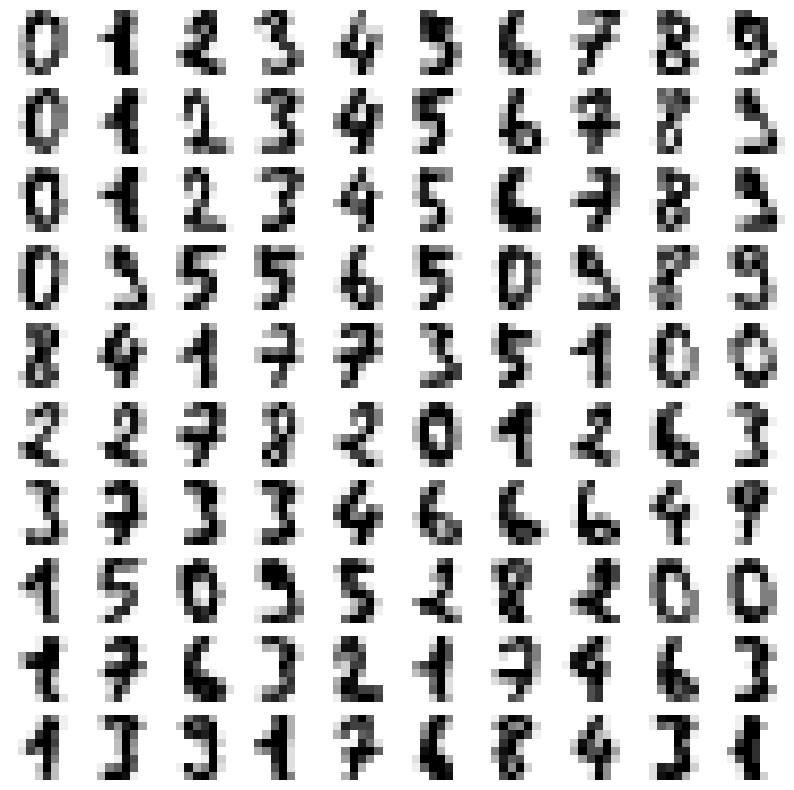

In [59]:
_,axs = plt.subplots(10,10,figsize=(10,10))
for r in range(10):
  for c in range(10):
    image = mnist.data[r*10+c]
    image = image.reshape(8,8)
    axs[r][c].imshow(image,cmap='gray_r')
    axs[r][c].axis('off')
plt.show()

In [60]:
for r in range(10):
  for c in range(10):
    print(mnist.target[r*10+c],end=' ')
  print()

0 1 2 3 4 5 6 7 8 9 
0 1 2 3 4 5 6 7 8 9 
0 1 2 3 4 5 6 7 8 9 
0 9 5 5 6 5 0 9 8 9 
8 4 1 7 7 3 5 1 0 0 
2 2 7 8 2 0 1 2 6 3 
3 7 3 3 4 6 6 6 4 9 
1 5 0 9 5 2 8 2 0 0 
1 7 6 3 2 1 7 4 6 3 
1 3 9 1 7 6 8 4 3 1 


In [61]:
mnist.data.max()

16.0

In [62]:
data = mnist.data
label = mnist.target

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [68]:
m1 = DecisionTreeClassifier()
m2 = RandomForestClassifier()
cv_scores=[]
for model in [m1,m2]:
  cv_score=[]
  for i in range(10):
    scores = cross_val_score(model,data,label,
                             cv=10,
                             scoring='accuracy')
    cv_score.append(scores.mean())
  cv_scores.append(cv_score)

In [69]:
print(cv_scores[0])
print(cv_scores[1])

[0.8207790192427064, 0.8263656114214774, 0.8185661080074489, 0.8235723153320919, 0.8313718187461203, 0.8163283674736188, 0.8269118559900683, 0.8269366852886406, 0.8180198634388578, 0.8185661080074487]
[0.9521384233395406, 0.9532588454376164, 0.9499068901303538, 0.9482464307883302, 0.9504655493482309, 0.946582867783985, 0.9488019863438858, 0.9443513345747983, 0.94768156424581, 0.9504686530105524]


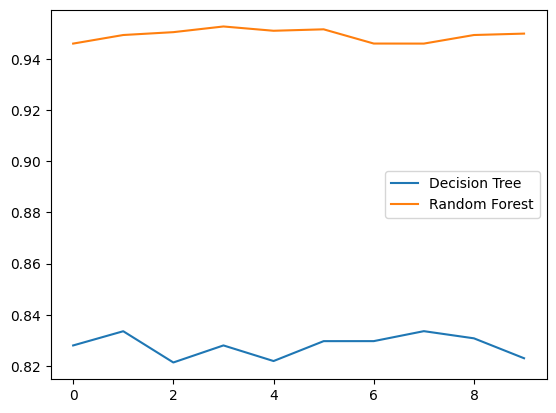

In [32]:
plt.plot(cv_scores[0],label="Decision Tree")
plt.plot(cv_scores[1],label="Random Forest")
plt.legend()
plt.show()

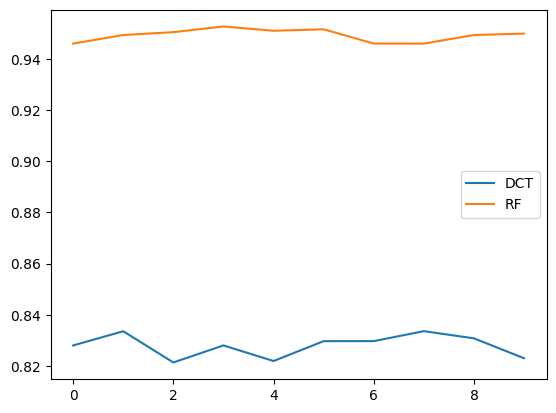

In [30]:
df = pd.DataFrame()
df['DCT'] = cv_scores[0]
df['RF'] = cv_scores[1]
df.plot()
plt.show()

In [33]:
from tensorflow import keras

In [34]:
md = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [43]:
mtrain , mtest = md

In [44]:
x_train,y_train = mtrain
x_test, y_test = mtest

In [46]:
x_train.shape, x_test.shape,y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

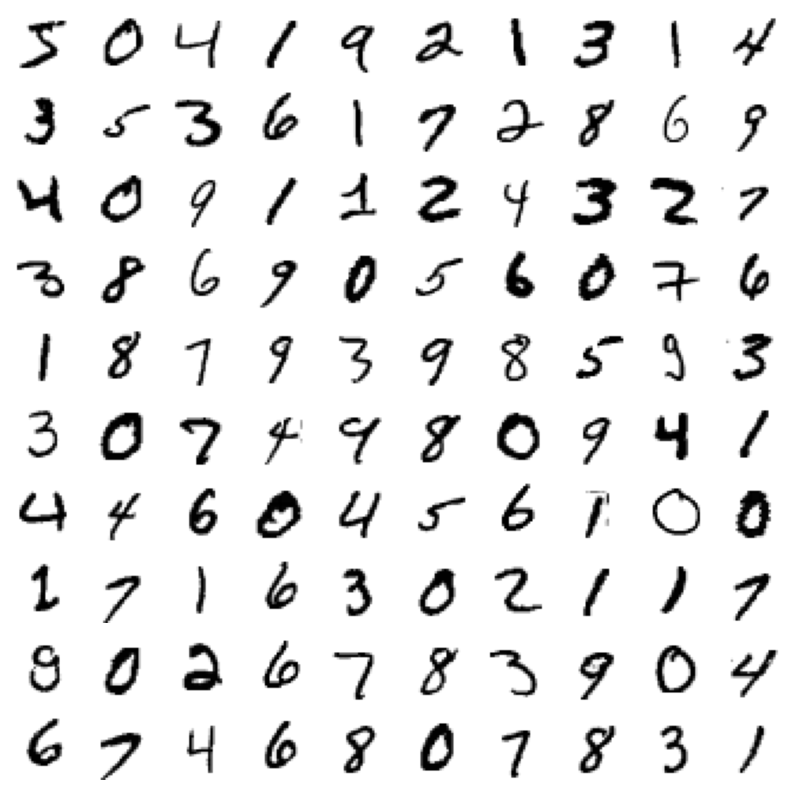

In [47]:
_,axs = plt.subplots(10,10,figsize=(10,10))
for r in range(10):
  for c in range(10):
    image = x_train[r*10+c]
    axs[r][c].imshow(image,cmap='gray_r')
    axs[r][c].axis('off')
plt.show()

In [48]:
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [52]:
m1 = DecisionTreeClassifier()
m2 = RandomForestClassifier()
cv_scores=[]
for model in [m1,m2]:
  cv_score=[]
  for i in range(10):
    scores = cross_val_score(model,x_train[:3000],y_train[:3000],
                             cv=10,
                             scoring='accuracy')
    cv_score.append(scores.mean())
  cv_scores.append(cv_score)

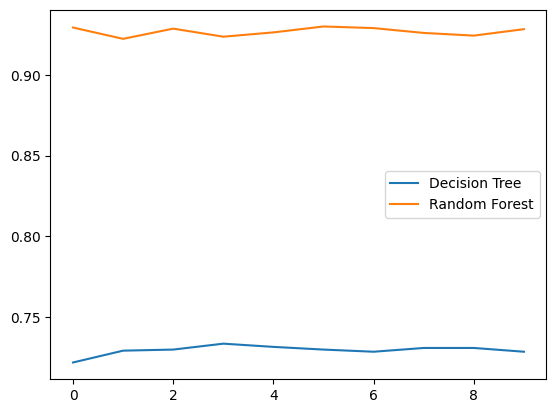

In [53]:
plt.plot(cv_scores[0],label="Decision Tree")
plt.plot(cv_scores[1],label="Random Forest")
plt.legend()
plt.show()

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [64]:
from sklearn.ensemble import VotingClassifier

In [ ]:
m1 = LogisticRegression()
m2 = SVC()
m3 = KNeighborsClassifier()
m4 = DecisionTreeClassifier()
m5 = RandomForestClassifier()
for model in [m1,m2,m3,m4,m5]:
  cv_score=[]
  for i in range(10):
    scores = cross_val_score(model,data,label,
                             cv=10,
                             scoring='accuracy')
    cv_score.append(scores.mean())
  cv_scores.append(cv_score)

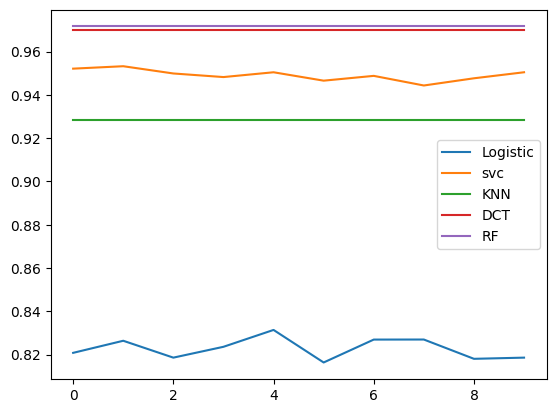

In [71]:
plt.plot(cv_scores[0],label="Logistic")
plt.plot(cv_scores[1],label="svc")
plt.plot(cv_scores[2],label="KNN")
plt.plot(cv_scores[3],label="DCT")
plt.plot(cv_scores[4],label="RF")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

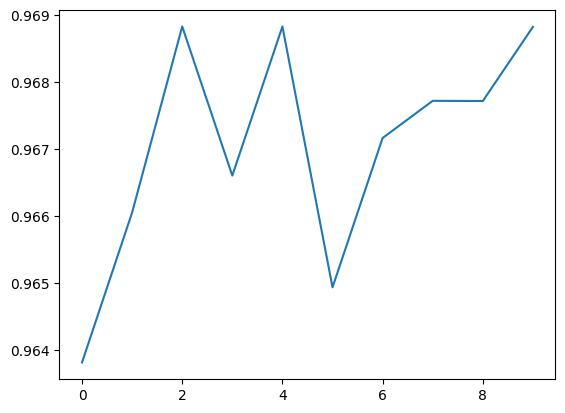

In [72]:
m1 = LogisticRegression()
m2 = SVC()
m3 = KNeighborsClassifier()
m4 = DecisionTreeClassifier()
m5 = RandomForestClassifier()
model = VotingClassifier(
    estimators=[('lr',m1),('svc',m2),('knn',m3),
                ('dt',m4),('rf',m5)],
   )
cv_score=[]
for i in range(10):
  scores = cross_val_score(model,data,label,
                             cv=10,
                             scoring='accuracy')
  cv_score.append(scores.mean())
plt.plot(cv_score)
plt.show()